In [1]:
import numpy as np
import matplotlib.pyplot as plt

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [34]:
npts = 10000
r = 1.0

Min. s value =  0.9888826024120986
Max. s value =  1.0000000019519912


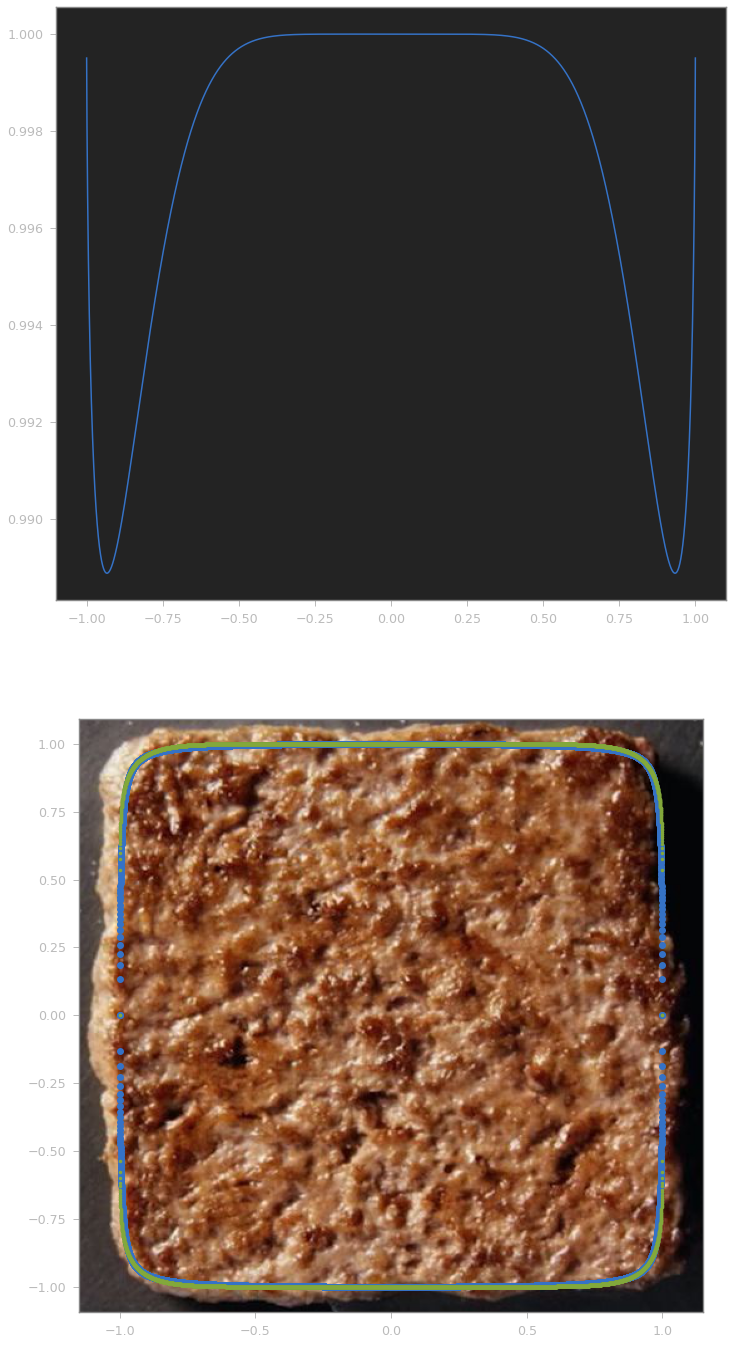

In [47]:
plt.rcParams["figure.figsize"] = (12,24)

figure, axis = plt.subplots(2, 1)

plot1 = plt.subplot2grid((2, 1), (0, 0), rowspan=1, colspan=1)
plot2 = plt.subplot2grid((2, 1), (1, 0), rowspan=1, colspan=1)

ex = 1.15
nlow = 10
nhigh = 10

im = plt.imread('wendys.jpg')
plot2.imshow(im, extent=[-ex, ex, -0.95*ex, 0.95*ex])

for n in range(nlow,nhigh+2,2):

    xplot = []
    splot = []

    smin  = 10000.0
    smax = 0.0

    for i in range(npts):
        x = -1.0+i*2.0/(npts-1)

        if ((x != 0) & ((r**n-x**n) != 0) ):
            scalc = ((r**2-(r**4-r**2*x**2)/((r**n-x**n)**(2.0/(n))))/x**2)**0.5
            if (scalc < smin):
                smin = scalc
            if (scalc > smax):
                smax = scalc
            xplot.append(x)
            splot.append(scalc)

    print('Min. s value = ',smin)
    print('Max. s value = ',smax)
    s = smin

    xarr = []
    yarr = []
    yarr2 = []

    for i in range(npts):
        x = -1.0+i*2.0/(npts-1)
        denom = 1.0-s**2*x**2/r**2
        if (denom != 0):
            yplus = np.sqrt((r**2-x**2)/denom)
            yminus = -yplus
            xarr.append(x)
            yarr.append(yplus)
            xarr.append(x)
            yarr.append(yminus)
        
            yplus2 = (r**n-x**n)**(1.0/n)
            yminus2 = -yplus2
            yarr2.append(yplus2)
            yarr2.append(yminus2)
                
    plot1.plot(xplot,splot,'-')

    plot2.plot(xarr,yarr,'o')
    plot2.plot(xarr,yarr2,'.')

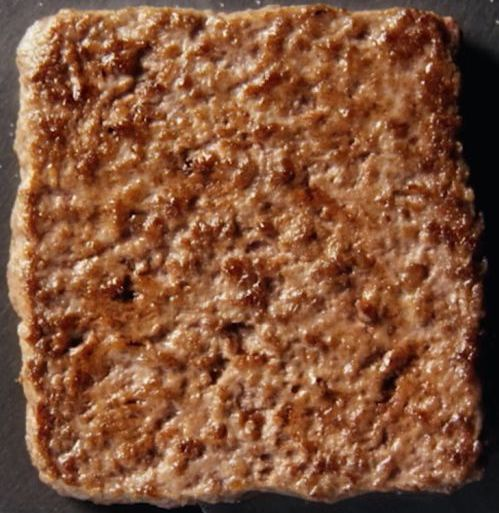

In [4]:
from IPython.display import Image
Image(filename='wendys.jpg') 